In [891]:
from numpy import *
import matplotlib.pyplot as plt 
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import numpy as np
from sklearn import preprocessing

## DATA RETRIEVAL
Load Dataset

In [892]:
boston = pd.read_csv('HousingData.csv')
use_cols = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT',
    'MEDV'
]
boston.describe

<bound method NDFrame.describe of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396

In [893]:
print("Shape of Dataset : ", boston.shape)
boston.head()

Shape of Dataset :  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


## DATA PREPARATION

Missing Data

In [894]:
from feature_cleaning import missing_data as ms

#MEAN MEDIAN MODE MISSING DATA
data = boston.fillna(boston.mean())
ms.check_missing(data=data)


,total missing,proportion
CRIM,0,0.0
ZN,0,0.0
INDUS,0,0.0
CHAS,0,0.0
NOX,0,0.0
RM,0,0.0
AGE,0,0.0
DIS,0,0.0
RAD,0,0.0
TAX,0,0.0


Outliers

In [895]:
from feature_cleaning import outlier as ot

#HANDLE THE OUTLIERS WITH DROP
data = data[~(data['MEDV'] >= 50.0)]
print(np.shape(data))

"""index,para = ot.outlier_detect_arbitrary(data,'RM',7.9,4.4)
print('Upper bound:',para[0],'\nLower bound:',para[1])

data = ot.drop_outlier(data=data,outlier_index=index)"""

#check outliers
for k, v in data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

(490, 14)
Column CRIM outliers = 12.86%
Column ZN outliers = 13.27%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 4.69%
Column AGE outliers = 0.00%
Column DIS outliers = 1.02%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.65%
Column B outliers = 15.92%
Column LSTAT outliers = 1.43%
Column MEDV outliers = 4.49%


Rare Values

In [896]:
from feature_cleaning import rare_values as ra
#enc = ra.ModeImputation(cols=use_cols,threshold=0.01).fit(data)
#print(enc.mapping)
#data = enc.transform(data)


Heat Map Correlation

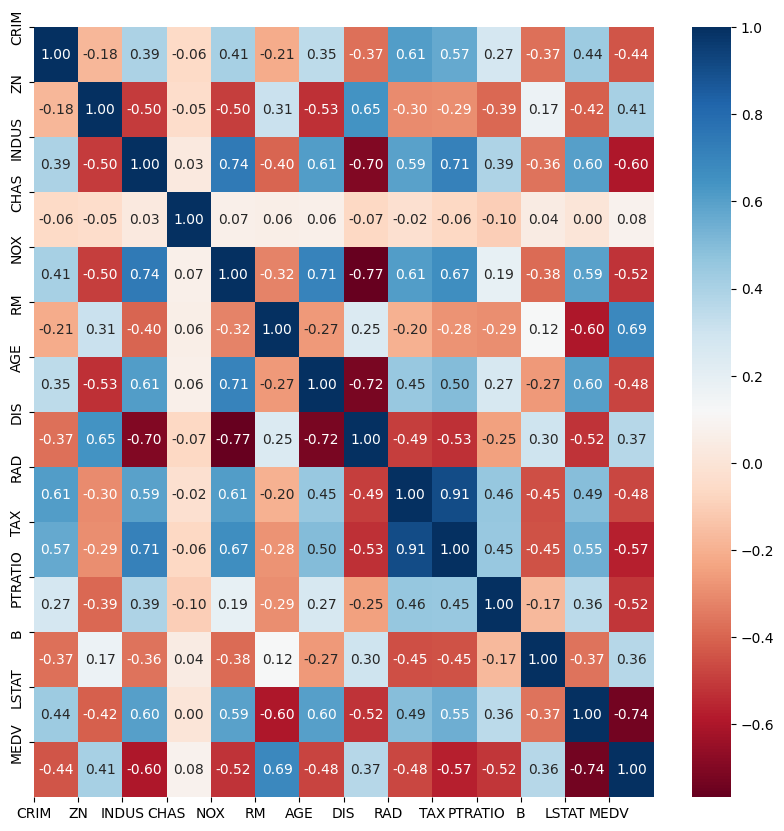

In [897]:
corr = data.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [898]:
#column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
# Split Value to X and Y
X = data.drop('MEDV', axis=1)
Y = data['MEDV']

In [899]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(392, 13)
(98, 13)
(392,)
(98,)


Feature Selection

In [900]:
from feature_selection import filter_method as ft
quasi_constant_feature = ft.constant_feature_detect(data=X_train,threshold=0.9)

# drop that variable
X_train.drop(labels=quasi_constant_feature,axis=1,inplace=True)
X_test.drop(labels=quasi_constant_feature,axis=1,inplace=True)
print(X_train.shape)

0  variables are found to be almost constant
(392, 13)


## MODELING
Linear Regression scatter Y test & Y pred

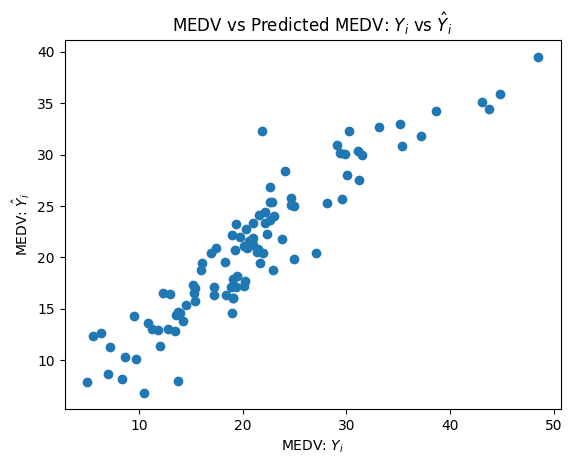

In [901]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

y_pred_from_sklearn = lm.predict(X_test)

plt.scatter(Y_test, y_pred_from_sklearn)
plt.xlabel(r"MEDV: $Y_i$")
plt.ylabel(r"MEDV: $\hat{Y}_i$")
plt.title(r"MEDV vs Predicted MEDV: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [902]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Predicting R2 Score the Train set results
y_pred_linear_train = lm.predict(X_train)
r2_score_linear_train = r2_score(Y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = lm.predict(X_test)
r2_score_linear_test = r2_score(Y_test, y_pred_linear_test)

Polynomial Regression - 2nd degree

In [903]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, Y_train)
regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_poly, Y_train)

from sklearn.metrics import r2_score

# Predicting R2 Score the Train set results
y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(X_train))
r2_score_poly2_train = r2_score(Y_train, y_pred_poly2_train)

# Predicting R2 Score the Test set results
y_pred_poly2_test = regressor_poly2.predict(poly_reg.fit_transform(X_test))
r2_score_poly2_test = r2_score(Y_test, y_pred_poly2_test)

Gradient Descent Optimization

## Model Evaluation

In [904]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(Y_test, y_pred_linear_test)))
print('R2_score linear (train): ', r2_score_linear_train)
print('R2_score linear(test): ', r2_score_linear_test)
print("RMSE linear: ", rmse_linear, "\n")

# Predicting RMSE the Test set results
rmse_poly2 = (np.sqrt(mean_squared_error(Y_test, y_pred_poly2_test)))
print('R2_score poly (train): ', r2_score_poly2_train)
print('R2_score poly (test): ', r2_score_poly2_test)
print("RMSE poly: ", rmse_poly2)

R2_score linear (train):  0.7409240465757738
R2_score linear(test):  0.8495497554662959
RMSE linear:  3.3731845540148124 

R2_score poly (train):  0.9295043271935249
R2_score poly (test):  0.807364117923726
RMSE poly:  3.816912876122375
